Gradientes dos pesos:
Customizado:
 [[-0.0002687 ]
 [-0.00077543]
 [ 0.00020079]
 [-0.00059469]]
PyTorch:
 tensor([[-0.0003],
        [-0.0008],
        [ 0.0002],
        [-0.0006]], dtype=torch.float64)

Gradientes dos vieses:
Customizado:
 [[-0.00036388 -0.00099806  0.00025506 -0.00072988]]
PyTorch:
 tensor([[-0.0004, -0.0010,  0.0003, -0.0007]], dtype=torch.float64)
Epoch: 0/10000	Cost = 4.65e-02	Time = 0.02
Epoch: 100/10000	Cost = 4.65e-02	Time = 2.54
Epoch: 200/10000	Cost = 4.64e-02	Time = 2.89
Epoch: 300/10000	Cost = 4.63e-02	Time = 2.43
Epoch: 400/10000	Cost = 4.63e-02	Time = 2.36
Epoch: 500/10000	Cost = 4.62e-02	Time = 1.91
Epoch: 600/10000	Cost = 4.62e-02	Time = 0.82
Epoch: 700/10000	Cost = 4.61e-02	Time = 0.73
Epoch: 800/10000	Cost = 4.60e-02	Time = 0.68
Epoch: 900/10000	Cost = 4.60e-02	Time = 0.72
Epoch: 1000/10000	Cost = 4.59e-02	Time = 0.64
Epoch: 1100/10000	Cost = 4.58e-02	Time = 0.67
Epoch: 1200/10000	Cost = 4.57e-02	Time = 1.76
Epoch: 1300/10000	Cost = 4.57e-02	Time = 

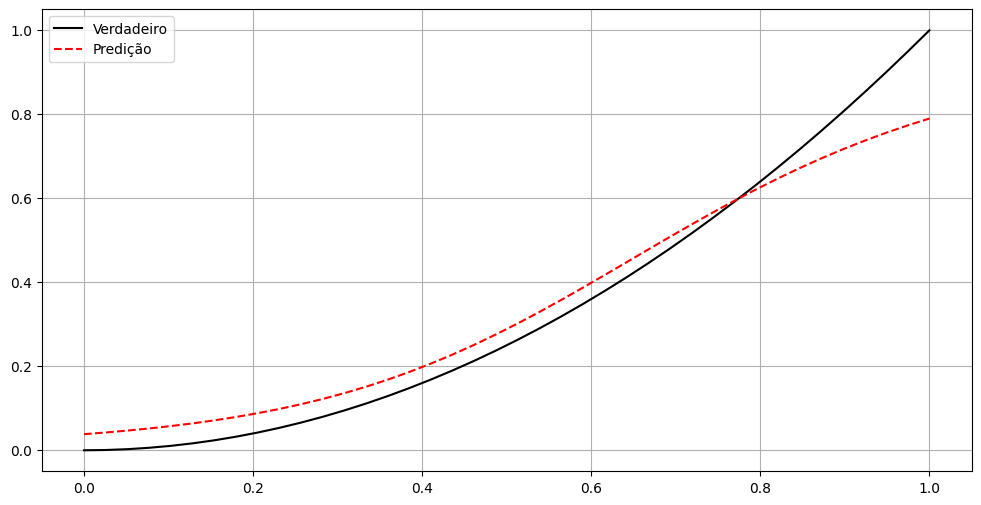

Epoch: 0/10000	Cost = 5.40e-02	Time = 0.02
Epoch: 100/10000	Cost = 4.66e-02	Time = 0.08
Epoch: 200/10000	Cost = 4.66e-02	Time = 0.07
Epoch: 300/10000	Cost = 4.65e-02	Time = 0.07
Epoch: 400/10000	Cost = 4.64e-02	Time = 0.07
Epoch: 500/10000	Cost = 4.64e-02	Time = 0.07
Epoch: 600/10000	Cost = 4.63e-02	Time = 0.07
Epoch: 700/10000	Cost = 4.62e-02	Time = 0.07
Epoch: 800/10000	Cost = 4.62e-02	Time = 0.07
Epoch: 900/10000	Cost = 4.61e-02	Time = 0.09
Epoch: 1000/10000	Cost = 4.60e-02	Time = 0.07
Epoch: 1100/10000	Cost = 4.59e-02	Time = 0.07
Epoch: 1200/10000	Cost = 4.58e-02	Time = 0.07
Epoch: 1300/10000	Cost = 4.58e-02	Time = 0.08
Epoch: 1400/10000	Cost = 4.57e-02	Time = 0.08
Epoch: 1500/10000	Cost = 4.56e-02	Time = 0.07
Epoch: 1600/10000	Cost = 4.55e-02	Time = 0.07
Epoch: 1700/10000	Cost = 4.54e-02	Time = 0.07
Epoch: 1800/10000	Cost = 4.53e-02	Time = 0.07
Epoch: 1900/10000	Cost = 4.51e-02	Time = 0.07
Epoch: 2000/10000	Cost = 4.50e-02	Time = 0.07
Epoch: 2100/10000	Cost = 4.49e-02	Time = 0.07


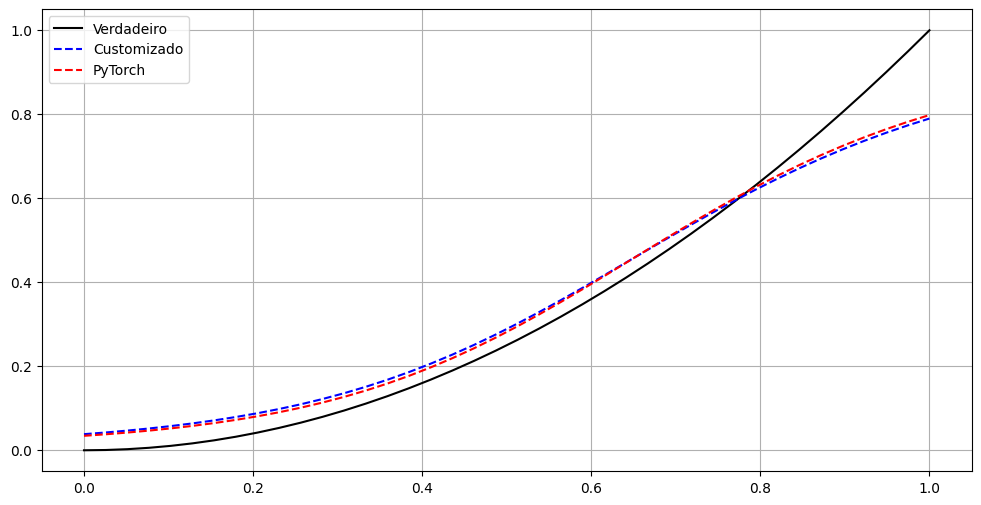

In [1]:
# Importação das bibliotecas necessárias
import numpy as np  # Para operações numéricas
import torch  # Para redes neurais e autograd
import matplotlib.pyplot as plt  # Para visualização
import time  # Para medir tempo de execução

# Classe da rede neural customizada
class neuralNetwork:
    def __init__(self, layers, activation, activationGradient, xavierInitialization=True):
        # Inicialização da rede neural com os parâmetros fornecidos
        self.L = len(layers)  # Número de camadas

        # Inicialização dos pesos (Xavier ou aleatória)
        if xavierInitialization:
            self.weights = [
                torch.nn.init.xavier_uniform_(
                    torch.zeros((layers[i], layers[i+1])),
                    gain=torch.nn.init.calculate_gain("sigmoid")
                ).numpy()
                for i in range(self.L-1)
            ]
        else:
            self.weights = [
                np.random.rand(layers[i], layers[i+1])
                for i in range(self.L-1)
            ]

        # Inicialização dos vieses (aleatórios)
        self.biases = [np.random.rand(1, layers[i+1]) for i in range(self.L-1)]

        # Lista para armazenar as ativações de cada camada
        self.layerActivations = []

        # Gradientes dos pesos e vieses (inicializados com zeros)
        self.weightGradients = [
            np.zeros((layers[i], layers[i+1]))
            for i in range(self.L-1)
        ]
        self.biasGradients = [
            np.zeros((1, layers[i+1]))
            for i in range(self.L-1)
        ]

        # Variáveis auxiliares para gradientes por amostra
        self.currentWeightGradients = [
            np.zeros((layers[i], layers[i+1]))
            for i in range(self.L-1)
        ]
        self.currentBiasGradients = [
            np.zeros((1, layers[i+1]))
            for i in range(self.L-1)
        ]

        # Funções de ativação e seu gradiente
        self.activation = activation
        self.activationGradient = activationGradient

    # Método para forward pass
    def forward(self, x):
        self.layerActivations = []  # Limpa as ativações anteriores
        a = x
        self.layerActivations.append(a)  # Ativação não aplicada à entrada

        # Passo por cada camada
        for i in range(self.L-1):
            z = a @ self.weights[i] + self.biases[i]  # Combinação linear
            self.layerActivations.append(z)  # Armazena as ativações
            a = self.activation(z)  # Aplica função de ativação
        return a

    # Método para backward pass
    def backward(self, y):
        if len(self.layerActivations) > 0:  # Verifica se forward foi executado
            n_samples = len(self.layerActivations[0])

            # Para uma única amostra
            if n_samples == 1:
                deltaL = -(y - self.activation(self.layerActivations[-1])) * \
                         self.activationGradient(self.layerActivations[-1])
                self.biasGradients[-1] = deltaL

                # Retropropagação
                for i in range(self.L-2):
                    deltal = np.sum(
                        self.weights[-1-i] * self.biasGradients[-1-i],
                        1
                    ) * self.activationGradient(self.layerActivations[-2-i])
                    self.biasGradients[-2-i] = deltal

                # Gradientes dos pesos
                self.weightGradients[0] = self.layerActivations[0].T @ self.biasGradients[0]
                for i in range(1, self.L-1):
                    self.weightGradients[i] = self.activation(self.layerActivations[i]).T @ self.biasGradients[i]

            # Para múltiplas amostras
            elif n_samples > 1:
                for j in range(n_samples):
                    # Gradiente da última camada
                    deltaL = -(y[j:j+1] - self.activation(self.layerActivations[-1][j:j+1])) * \
                             self.activationGradient(self.layerActivations[-1][j:j+1])

                    self.currentBiasGradients[-1] = deltaL / n_samples
                    self.biasGradients[-1] += self.currentBiasGradients[-1]

                    # Retropropagação
                    for i in range(self.L-2):
                        deltal = np.sum(
                            self.weights[-1-i] * self.currentBiasGradients[-1-i],
                            1
                        ) * self.activationGradient(self.layerActivations[-2-i][j:j+1])
                        self.currentBiasGradients[-2-i] = deltal
                        self.biasGradients[-2-i] += self.currentBiasGradients[-2-i]

                    # Gradientes dos pesos
                    self.currentWeightGradients[0] = self.layerActivations[0][j:j+1].T @ self.currentBiasGradients[0]
                    self.weightGradients[0] += self.currentWeightGradients[0]

                    for i in range(1, self.L-1):
                        self.currentWeightGradients[i] = self.activation(
                            self.layerActivations[i][j:j+1]
                        ).T @ self.currentBiasGradients[i]
                        self.weightGradients[i] += self.currentWeightGradients[i]

    # Zera os gradientes
    def zero_grad(self):
        self.weightGradients = [
            np.zeros_like(w) for w in self.weightGradients
        ]
        self.biasGradients = [
            np.zeros_like(b) for b in self.biasGradients
        ]

    # Atualiza os parâmetros
    def step(self, lr):
        for i in range(self.L-1):
            self.weights[i] -= lr * self.weightGradients[i]
            self.biases[i] -= lr * self.biasGradients[i]

# Definição do modelo
layers = [1, 4, 4, 1]  # Arquitetura da rede
sigmoid = lambda x: 1/(1+np.exp(-x))  # Função de ativação
sigmoidGradient = lambda x: sigmoid(x)*(1-sigmoid(x))  # Gradiente

model = neuralNetwork(layers, sigmoid, sigmoidGradient)

# Dados de entrada e saída
x = np.expand_dims(np.linspace(0, 1, 2), 1) + 0.2
y = np.sin(4*np.pi*x)**2

# Predição e cálculo do custo
yPred = model.forward(x)
C = 0.5 * np.mean((yPred-y)**2)
model.backward(y)

# Implementação equivalente em PyTorch para verificação
class neuralNetworkTorch(torch.nn.Module):
    def __init__(self, layers, activationFunction=torch.nn.Sigmoid()):
        super().__init__()
        modules = []
        for i in range(len(layers)-1):
            modules.append(torch.nn.Linear(layers[i], layers[i+1]))
            modules.append(activationFunction)
        self.model = torch.nn.Sequential(*modules)

    def forward(self, x):
        return self.model(x)

# Cria e configura modelo PyTorch
modelTorch = neuralNetworkTorch(layers)

# Copia parâmetros do modelo customizado
with torch.no_grad():
    for i, param in enumerate(modelTorch.parameters()):
        if i % 2 == 0:  # Pesos
            param.data = torch.from_numpy(model.weights[i//2]).to(torch.float64).t()
        else:  # Vieses
            param.data = torch.from_numpy(model.biases[i//2]).to(torch.float64)

# Verificação no PyTorch
xTorch = torch.from_numpy(x).to(torch.float64)
yPredTorch = modelTorch(xTorch)
CTorch = 0.5 * torch.mean((yPredTorch - torch.from_numpy(y).to(torch.float64))**2)
CTorch.backward()

# Comparação dos gradientes
layer = 0
print("Gradientes dos pesos:")
print("Customizado:\n", np.transpose(model.weightGradients[layer]))
print("PyTorch:\n", list(modelTorch.parameters())[2*layer].grad)

print("\nGradientes dos vieses:")
print("Customizado:\n", model.biasGradients[layer])
print("PyTorch:\n", list(modelTorch.parameters())[2*layer+1].grad)

# Implementação do otimizador Adam
class AdamOptimizer:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr  # Taxa de aprendizado
        self.beta1 = beta1  # Decaimento para 1° momento
        self.beta2 = beta2  # Decaimento para 2° momento
        self.epsilon = epsilon  # Termo de estabilização
        self.m = None  # 1° momento
        self.n = None  # 2° momento
        self.t = 0  # Contador de iterações

    def updateParams(self, params, grads):
        # Inicializa momentos na primeira iteração
        if self.m is None:
            self.m = [np.zeros_like(p) for p in params]
        if self.n is None:
            self.n = [np.zeros_like(p) for p in params]

        self.t += 1
        updated_params = []

        # Atualiza cada parâmetro
        for p, g, m, n in zip(params, grads, self.m, self.n):
            # Atualiza momentos
            m[:] = self.beta1*m + (1-self.beta1)*g
            n[:] = self.beta2*n + (1-self.beta2)*(g**2)

            # Corrige viés
            m_hat = m/(1-self.beta1**self.t)
            n_hat = n/(1-self.beta2**self.t)

            # Atualiza parâmetro
            updated_params.append(p - self.lr*m_hat/(np.sqrt(n_hat)+self.epsilon))

        return updated_params

# Configuração do treinamento
selectOptimizer = "gradientDescent"  # Ou 'Adam'
layers = [1, 20, 20, 1]  # Arquitetura maior
model = neuralNetwork(layers, sigmoid, sigmoidGradient)
x = np.expand_dims(np.linspace(0, 1, 40), 1)  # Dados de treino

if selectOptimizer == "gradientDescent":
    y = x**2  # Função alvo simples
    epochs = 10000
    lr = 1e-1
elif selectOptimizer == "Adam":
    y = np.sin(2*np.pi*x)**2  # Função mais complexa
    lr = 1e-2
    optimizer = AdamOptimizer(lr=lr)

# Loop de treinamento
start = time.perf_counter()
for epoch in range(epochs):
    model.zero_grad()
    yPred = model.forward(x)
    C = 0.5 * np.mean((yPred-y)**2)
    model.backward(y)

    if selectOptimizer == "gradientDescent":
        model.step(lr)
    elif selectOptimizer == "Adam":
        updated = optimizer.updateParams(
            model.weights + model.biases,
            model.weightGradients + model.biasGradients
        )
        model.weights = updated[:model.L-1]
        model.biases = updated[model.L-1:]

    # Log periódico
    if epoch % 100 == 0:
        elapsed = time.perf_counter()-start
        print(f"Epoch: {epoch}/{epochs}\tCost = {C:.2e}\tTime = {elapsed:.2f}")
        start = time.perf_counter()

# Visualização dos resultados
yPred = model.forward(x)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x, y, 'k', label="Verdadeiro")
plt.plot(x, yPred, 'r--', label="Predição")
plt.legend()
plt.show()

# Configuração equivalente em PyTorch
modelTorch = neuralNetworkTorch(layers)
xTorch = torch.from_numpy(x).to(torch.float32)
yTorch = torch.from_numpy(y).to(torch.float32)

if selectOptimizer == "gradientDescent":
    optimizer = torch.optim.SGD(modelTorch.parameters(), lr)
elif selectOptimizer == "Adam":
    optimizer = torch.optim.Adam(modelTorch.parameters(), lr)

# Treinamento no PyTorch
start = time.perf_counter()
for epoch in range(epochs):
    optimizer.zero_grad()
    yPredTorch = modelTorch(xTorch)
    CTorch = 0.5 * torch.mean((yPredTorch-yTorch)**2)
    CTorch.backward()
    optimizer.step()

    if epoch % 100 == 0:
        elapsed = time.perf_counter()-start
        print(f"Epoch: {epoch}/{epochs}\tCost = {CTorch.item():.2e}\tTime = {elapsed:.2f}")
        start = time.perf_counter()

# Visualização comparativa
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x, y, 'k', label="Verdadeiro")
plt.plot(x, yPred, 'b--', label="Customizado")
plt.plot(x, yPredTorch.detach().numpy(), 'r--', label="PyTorch")
plt.legend()
plt.show()